In [2]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib as plt

In [33]:
file = "US County Votes_FINAL.csv"
votes_df = pd.read_csv(file, encoding = 'utf-8')
#votes_df.head()
votes_df.dtypes

FIPS                int64
County             object
State              object
Dem 2008 (%)      float64
Rep 2008 (%)      float64
Other 2008 (%)    float64
Party 2008         object
Dem 2012 (%)      float64
Rep 2012 (%)      float64
Other 2012 (%)    float64
Party 2012         object
Dem 2016 (%)      float64
Rep 2016 (%)      float64
Other 2016 (%)    float64
Party 2016         object
dtype: object

In [4]:

#filename = 'usa-2016-presidential-election-by-county.json'

#with open(filename, 'r') as f:
#        datastore = json.load(f)



In [5]:
#df = pd.DataFrame.from_dict(datastore, orient='columns')
#data = df['fields']
#data = data.head(5)
#data1 = data[0]

#data2 = pd.DataFrame([data1], columns=data1.keys())
#data2

In [6]:
#pd.set_option('display.height', 5000)
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 1000)
#pd.set_option('display.width', 1000)

#master_df = data.apply(pd.Series)
#unemp_df = master_df.loc[:,['fips','unemployment']]
#unemp_df = unemp_df.rename(columns={'fips':'FIPS','unemployment':'Unemployment'})
#unemp_df['FIPS']=unemp_df['FIPS'].astype(int)
#unemp_df.head()

height has been deprecated.



,FIPS,Unemployment
0,5085,0.061
1,5095,0.084
2,5043,0.108
3,5087,0.053
4,13159,0.096


In [39]:
temp_df= pd.read_excel(open('Unemployment.xls','rb'), sheetname='Unemployment Med HH Inc')
temp_df = temp_df.iloc[6:,:]
temp_df.columns = temp_df.iloc[0,:]
temp_df=temp_df.drop(temp_df.index[0])
temp_df = temp_df.rename(columns={'FIPStxt':'FIPS'})
unemp_df = temp_df.loc[:,['FIPS','Unemployment_rate_2008','Unemployment_rate_2012','Unemployment_rate_2016']]
unemp_df['FIPS'] = unemp_df['FIPS'].astype(int)
unemp_df.head()

6,FIPS,Unemployment_rate_2008,Unemployment_rate_2012,Unemployment_rate_2016
7,1000,5.7,8,6
8,1001,5.1,6.9,5.3
9,1003,4.6,7.5,5.4
10,1005,8.8,11.5,8.6
11,1007,5.8,8.5,6.6


In [42]:
unemployment_df= pd.merge(unemp_df,votes_df,on='FIPS')
unemployment_df['Party 2016']=unemployment_df['Party 2016'].astype(str)
unemployment_df.head()

,FIPS,Unemployment_rate_2008,Unemployment_rate_2012,Unemployment_rate_2016,County,State,Dem 2008 (%),Rep 2008 (%),Other 2008 (%),Party 2008,Dem 2012 (%),Rep 2012 (%),Other 2012 (%),Party 2012,Dem 2016 (%),Rep 2016 (%),Other 2016 (%),Party 2016
0,1001,5.1,6.9,5.3,Autauga County,AL,25.8,73.6,0.6,Red,26.6,72.6,0.8,Red,24.0,73.4,2.6,Red
1,1003,4.6,7.5,5.4,Baldwin County,AL,23.8,75.3,0.9,Red,21.6,77.4,1.0,Red,19.6,77.4,3.1,Red
2,1005,8.8,11.5,8.6,Barbour County,AL,49.0,50.4,0.6,Split,51.3,48.3,0.4,Split,46.7,52.3,1.1,Red
3,1007,5.8,8.5,6.6,Bibb County,AL,26.6,72.4,1.0,Red,26.2,73.1,0.7,Red,21.4,77.0,1.6,Red
4,1009,4.7,6.9,5.5,Blount County,AL,14.5,84.0,1.5,Red,12.3,86.5,1.2,Red,8.5,89.9,1.7,Red


In [62]:
bins = [0,3,4,5,6,7,8,9,10,11,12,13,14,30]
group_labels = ["<3%","3-4%","4-5%","5-6%","6-7%","7-8%","8-9%","9-10%","10-11%","11-12%","12-13%","13-14%",">14%"]
unemployment_df["category"] = pd.cut(unemployment_df['Unemployment_rate_2016'],bins,labels=group_labels)

unemp = unemployment_df.sort_values('category')

unemp =unemp.groupby('category')
def count_red(grp):
    return np.sum(grp=='Red')
def count_blue(grp):
    return np.sum(grp=='Blue')
def count_split(grp):
    return np.sum(grp=='Split')

result = unemp.agg({'County':'count','Party 2016': [count_red, count_blue,count_split]})
result.columns = result.columns.get_level_values(-1)
result = result.rename(columns={'count':'Counties', 'count_red':'2016 Red','count_blue':'2016 Blue','count_split':'2016 Split'})
result['2016 % Red'] = result['2016 Red']/result['Counties']
result['2016 % Blue'] = result['2016 Blue']/result['Counties']
result['2016 % Split'] = result['2016 Split']/result['Counties']

result16 = result
result16.head()

,Counties,2016 Red,2016 Blue,2016 Split,2016 % Red,2016 % Blue,2016 % Split
category,,,,,,,
<3%,228,185,20,23,0.811404,0.087719,0.100877
3-4%,583,448,56,79,0.768439,0.096055,0.135506
4-5%,823,670,78,75,0.814095,0.094775,0.091130
5-6%,659,528,72,59,0.801214,0.109256,0.089530
6-7%,409,331,38,40,0.809291,0.092910,0.097800


In [61]:
bins = [0,3,4,5,6,7,8,9,10,11,12,13,14,30]
group_labels = ["<3%","3-4%","4-5%","5-6%","6-7%","7-8%","8-9%","9-10%","10-11%","11-12%","12-13%","13-14%",">14%"]
unemployment_df["category"] = pd.cut(unemployment_df['Unemployment_rate_2012'],bins,labels=group_labels)

unemp = unemployment_df.sort_values('category')

unemp =unemp.groupby('category')
def count_red(grp):
    return np.sum(grp=='Red')
def count_blue(grp):
    return np.sum(grp=='Blue')
def count_split(grp):
    return np.sum(grp=='Split')

result = unemp.agg({'County':'count','Party 2016': [count_red, count_blue,count_split]})
result.columns = result.columns.get_level_values(-1)
result = result.rename(columns={'count':'Counties', 'count_red':'2012 Red','count_blue':'2012 Blue','count_split':'2012 Split'})
result['2012 % Red'] = result['2012 Red']/result['Counties']
result['2012 % Blue'] = result['2012 Blue']/result['Counties']
result['2012 % Split'] = result['2012 Split']/result['Counties']

result12=result
result12.head()

,Counties,2012 Red,2012 Blue,2012 Split,2012 % Red,2012 % Blue,2012 % Split
category,,,,,,,
<3%,57,56,0,1,0.982456,0.000000,0.017544
3-4%,186,177,5,4,0.951613,0.026882,0.021505
4-5%,249,213,13,23,0.855422,0.052209,0.092369
5-6%,345,273,32,40,0.791304,0.092754,0.115942
6-7%,408,316,42,50,0.774510,0.102941,0.122549


In [60]:
bins = [0,3,4,5,6,7,8,9,10,11,12,13,14,30]
group_labels = ["<3%","3-4%","4-5%","5-6%","6-7%","7-8%","8-9%","9-10%","10-11%","11-12%","12-13%","13-14%",">14%"]
unemployment_df["category"] = pd.cut(unemployment_df['Unemployment_rate_2008'],bins,labels=group_labels)

unemp = unemployment_df.sort_values('category')

unemp =unemp.groupby('category')
def count_red(grp):
    return np.sum(grp=='Red')
def count_blue(grp):
    return np.sum(grp=='Blue')
def count_split(grp):
    return np.sum(grp=='Split')

result = unemp.agg({'County':'count','Party 2008': [count_red, count_blue,count_split]})
result.columns = result.columns.get_level_values(-1)
result = result.rename(columns={'count':'Counties', 'count_red':'2008 Red','count_blue':'2008 Blue','count_split':'2008 Split'})
result['2008 % Red'] = result['2008 Red']/result['Counties']
result['2008 % Blue'] = result['2008 Blue']/result['Counties']
result['2008 % Split'] = result['2008 Split']/result['Counties']

result08=result
result08.head()

,Counties,2008 Red,2008 Blue,2008 Split,2008 % Red,2008 % Blue,2008 % Split
category,,,,,,,
<3%,183,159,12,12,0.868852,0.065574,0.065574
3-4%,437,343,50,44,0.784897,0.114416,0.100686
4-5%,594,379,140,75,0.638047,0.235690,0.126263
5-6%,636,394,160,82,0.619497,0.251572,0.128931
6-7%,521,324,124,73,0.621881,0.238004,0.140115


In [63]:
writer = pd.ExcelWriter('UnemploymentAnalysis.xlsx', engine='xlsxwriter')

result16.to_excel(writer, sheet_name='2016')
result12.to_excel(writer, sheet_name='2012')
result08.to_excel(writer, sheet_name='2008')


writer.save()

In [69]:
bins = [0,3,4,5,6,7,8,9,10,11,12,13,14,30]
group_labels = ["<3%","3-4%","4-5%","5-6%","6-7%","7-8%","8-9%","9-10%","10-11%","11-12%","12-13%","13-14%",">14%"]

temp = unemployment_df
temp["category"] = pd.cut(temp['Unemployment_rate_2016'],bins,labels=group_labels)

temp16 = temp.sort_values('category')

temp16 =temp16.groupby('category')
def count_red(grp):
    return np.sum(grp=='Red')
def count_blue(grp):
    return np.sum(grp=='Blue')
def count_split(grp):
    return np.sum(grp=='Split')

result16 = temp16.agg({'County':'count','Party 2016': [count_red, count_blue,count_split]})
#result = result.reset_index()
result16.columns = result16.columns.get_level_values(-1)
result16 = result16.rename(columns={'count':'Counties', 'count_red':'2016 Red','count_blue':'2016 Blue','count_split':'2016 Split'})
result16['2016 % Red'] = result16['2016 Red']/result16['Counties']
result16['2016 % Blue'] = result16['2016 Blue']/result16['Counties']
result16['2016 % Split'] = result16['2016 Split']/result16['Counties']
result16['y_offsetblue']= result16['2016 % Split'] + result16['2016 % Red']


result16

,Counties,2016 Red,2016 Blue,2016 Split,2016 % Red,2016 % Blue,2016 % Split,y_offsetblue
category,,,,,,,,
<3%,228,185,20,23,0.811404,0.087719,0.100877,0.912281
3-4%,583,448,56,79,0.768439,0.096055,0.135506,0.903945
4-5%,823,670,78,75,0.814095,0.094775,0.091130,0.905225
5-6%,659,528,72,59,0.801214,0.109256,0.089530,0.890744
6-7%,409,331,38,40,0.809291,0.092910,0.097800,0.907090
7-8%,208,164,30,14,0.788462,0.144231,0.067308,0.855769
8-9%,98,68,22,8,0.693878,0.224490,0.081633,0.775510
9-10%,48,38,9,1,0.791667,0.187500,0.020833,0.812500
10-11%,27,16,10,1,0.592593,0.370370,0.037037,0.629630


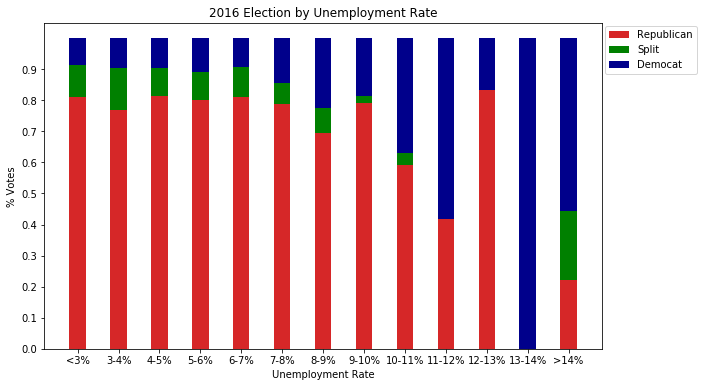

In [82]:
import matplotlib.pyplot as plt
bin_label= []
for index, row in result.iterrows():
        bin_label.append(index)

ind = np.arange(len(bin_label))    # the x locations for the groups
width = 0.40       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(10,6))
p1 = plt.bar(ind, result16['2016 % Red'], width, color='#d62728')

p2 = plt.bar(ind, result16['2016 % Split'], width,color='green',bottom=result16['2016 % Red'])

p3 = plt.bar(ind, result16['2016 % Blue'], width,color = 'darkblue',bottom=result16['y_offsetblue'])

plt.ylabel('% Votes')
plt.title('2016 Election by Unemployment Rate')
plt.xticks(ind, bin_label)
plt.yticks(np.arange(0, 1,0.1))
plt.xlabel('Unemployment Rate')

plt.legend(handles =[p1[0], p2[0],p3[0]],labels=['Republican','Split','Democat'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.3)

plt.savefig('2016ElectionbyUnemploymentRate.png',bbox_inches='tight')
plt.show()

In [72]:
ls = [x+y for x in result['2016 % Split'] for y in result['2016 % Red']]
ls

[0.91228070175438591,
 0.86931630104420565,
 0.91497196819509286,
 0.90209115352873837,
 0.9101681465276884,
 0.88933873144399456,
 0.79475474400286428,
 0.89254385964912275,
 0.69346978557504868,
 0.51754385964912286,
 0.93421052631578949,
 0.10087719298245613,
 0.32309941520467833,
 0.94690951220246156,
 0.90394511149228129,
 0.9496007786431685,
 0.93671996397681401,
 0.94479695697576405,
 0.9239675418920702,
 0.82938355445093992,
 0.92717267009719839,
 0.72809859602312432,
 0.55217267009719839,
 0.96883933676386513,
 0.13550600343053174,
 0.35772822565275397,
 0.90253352092259809,
 0.85956912021241783,
 0.90522478736330503,
 0.89234397269695054,
 0.90042096569590058,
 0.87959155061220673,
 0.78500756317107645,
 0.88279667881733492,
 0.68372260474326085,
 0.50779667881733492,
 0.92446334548400166,
 0.091130012150668294,
 0.3133522343728905,
 0.90093309906024543,
 0.85796869835006517,
 0.90362436550095238,
 0.89074355083459789,
 0.89882054383354792,
 0.87799112874985408,
 0.7834071413